# You can get the dataframe from here : 
https://www.kaggle.com/datasets/suleymansulak/obesity-dataset

# The imports 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

# Reading the dataset

In [3]:
df = pd.read_excel('Obesity_Dataset.xlsx')

# Consultation 

In [4]:
df.head(2)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2


In [12]:
df.isnull().sum()

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

# Training and evaluation of the models

/home/azar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 0.72


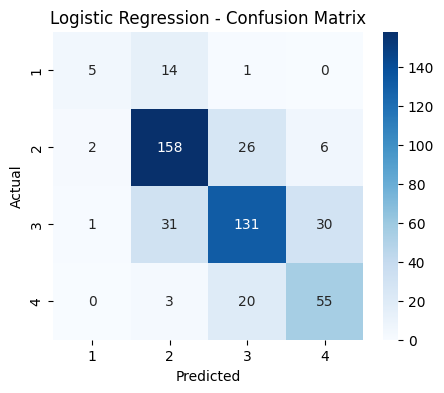

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.25      0.36        20
           2       0.77      0.82      0.79       192
           3       0.74      0.68      0.71       193
           4       0.60      0.71      0.65        78

    accuracy                           0.72       483
   macro avg       0.68      0.61      0.63       483
weighted avg       0.72      0.72      0.72       483


Model: Decision Tree
Accuracy: 0.77


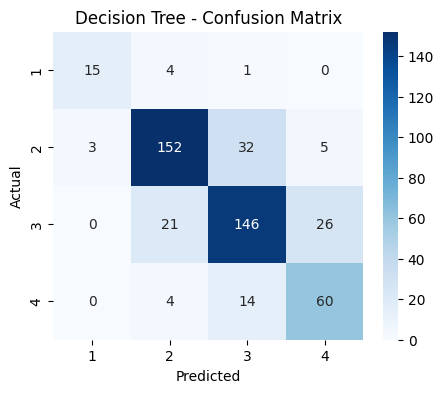

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.75      0.79        20
           2       0.84      0.79      0.82       192
           3       0.76      0.76      0.76       193
           4       0.66      0.77      0.71        78

    accuracy                           0.77       483
   macro avg       0.77      0.77      0.77       483
weighted avg       0.78      0.77      0.77       483


Model: Random Forest
Accuracy: 0.83


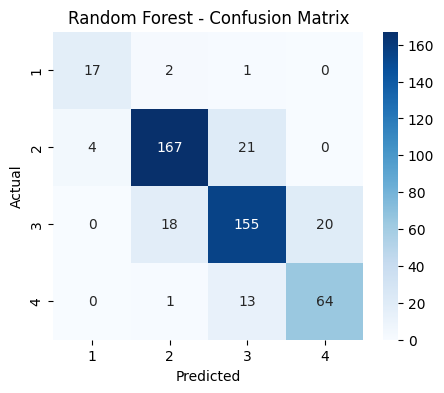

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       0.89      0.87      0.88       192
           3       0.82      0.80      0.81       193
           4       0.76      0.82      0.79        78

    accuracy                           0.83       483
   macro avg       0.82      0.84      0.83       483
weighted avg       0.84      0.83      0.83       483


Model: K-Nearest Neighbors
Accuracy: 0.67


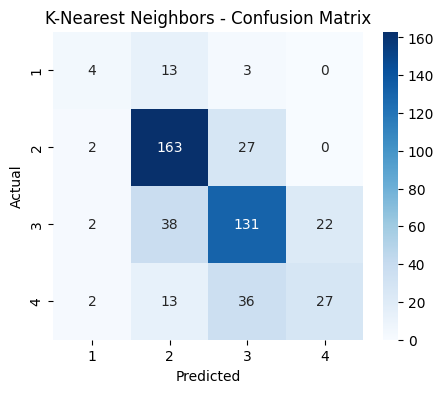

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.20      0.27        20
           2       0.72      0.85      0.78       192
           3       0.66      0.68      0.67       193
           4       0.55      0.35      0.43        78

    accuracy                           0.67       483
   macro avg       0.58      0.52      0.54       483
weighted avg       0.66      0.67      0.66       483



In [15]:
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# Saving the best model

In [20]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save the model to a file
dump(rf_model, 'random_forest_model.joblib')
print("Model saved successfully!")


Model saved successfully!
